In [ ]:
import numpy as np

with open('input.txt') as f:
    lines = f.readlines()

points = np.array([[int(c) for c in line.strip().split(',')] for line in lines], dtype=np.int64)

In [36]:
num_points = points.shape[0]
r1, r2 = np.triu_indices(num_points, k=1)
pairs = np.column_stack((r1, r2))

diff = np.abs(points[r1] - points[r2]) + 1
areas = np.prod(diff, axis=1)

sorted_indices = np.argsort(areas)
print("Part 1:", areas[sorted_indices[-1]])

Part 1: 50


In [37]:
def ray_casting(point: tuple[int, int], points) -> bool:
    y, x = point
    inside = False
    for point_a, point_b in zip(points, np.roll(points, -1, axis=0)):
        ay, ax = point_a
        by, bx = point_b
        
        # Check if point sits on chord, if so, consider it inside
        for (py, px) in (point_a, point_b):
            if (y == py) and min(ax, bx) <= x <= max(ax, bx):
                return True
            if (x == px) and min(ay, by) <= y <= max(ay, by):
                return True
        
        if ((ay > y) != (by > y)) and (x < (bx - ax) * (y - ay) / (by - ay) + bx):
            inside = not inside
    return inside

# O(n²) algorithm to check for every pair if one point does not lie within it
for pair_idx in reversed(sorted_indices):
    a, b = points[pairs[pair_idx][0]], points[pairs[pair_idx][1]]
    
    # Ray casting algorithm to check if both new corner points are inside the polygon
    
    corner1 = (a[0], b[1])
    corner2 = (b[0], a[1])
    
    if ray_casting(corner1, points) and ray_casting(corner2, points):
        print("Part 2:", areas[pair_idx], "with points", a, b)
        break

Part 2: 24 with points [9 5] [2 3]


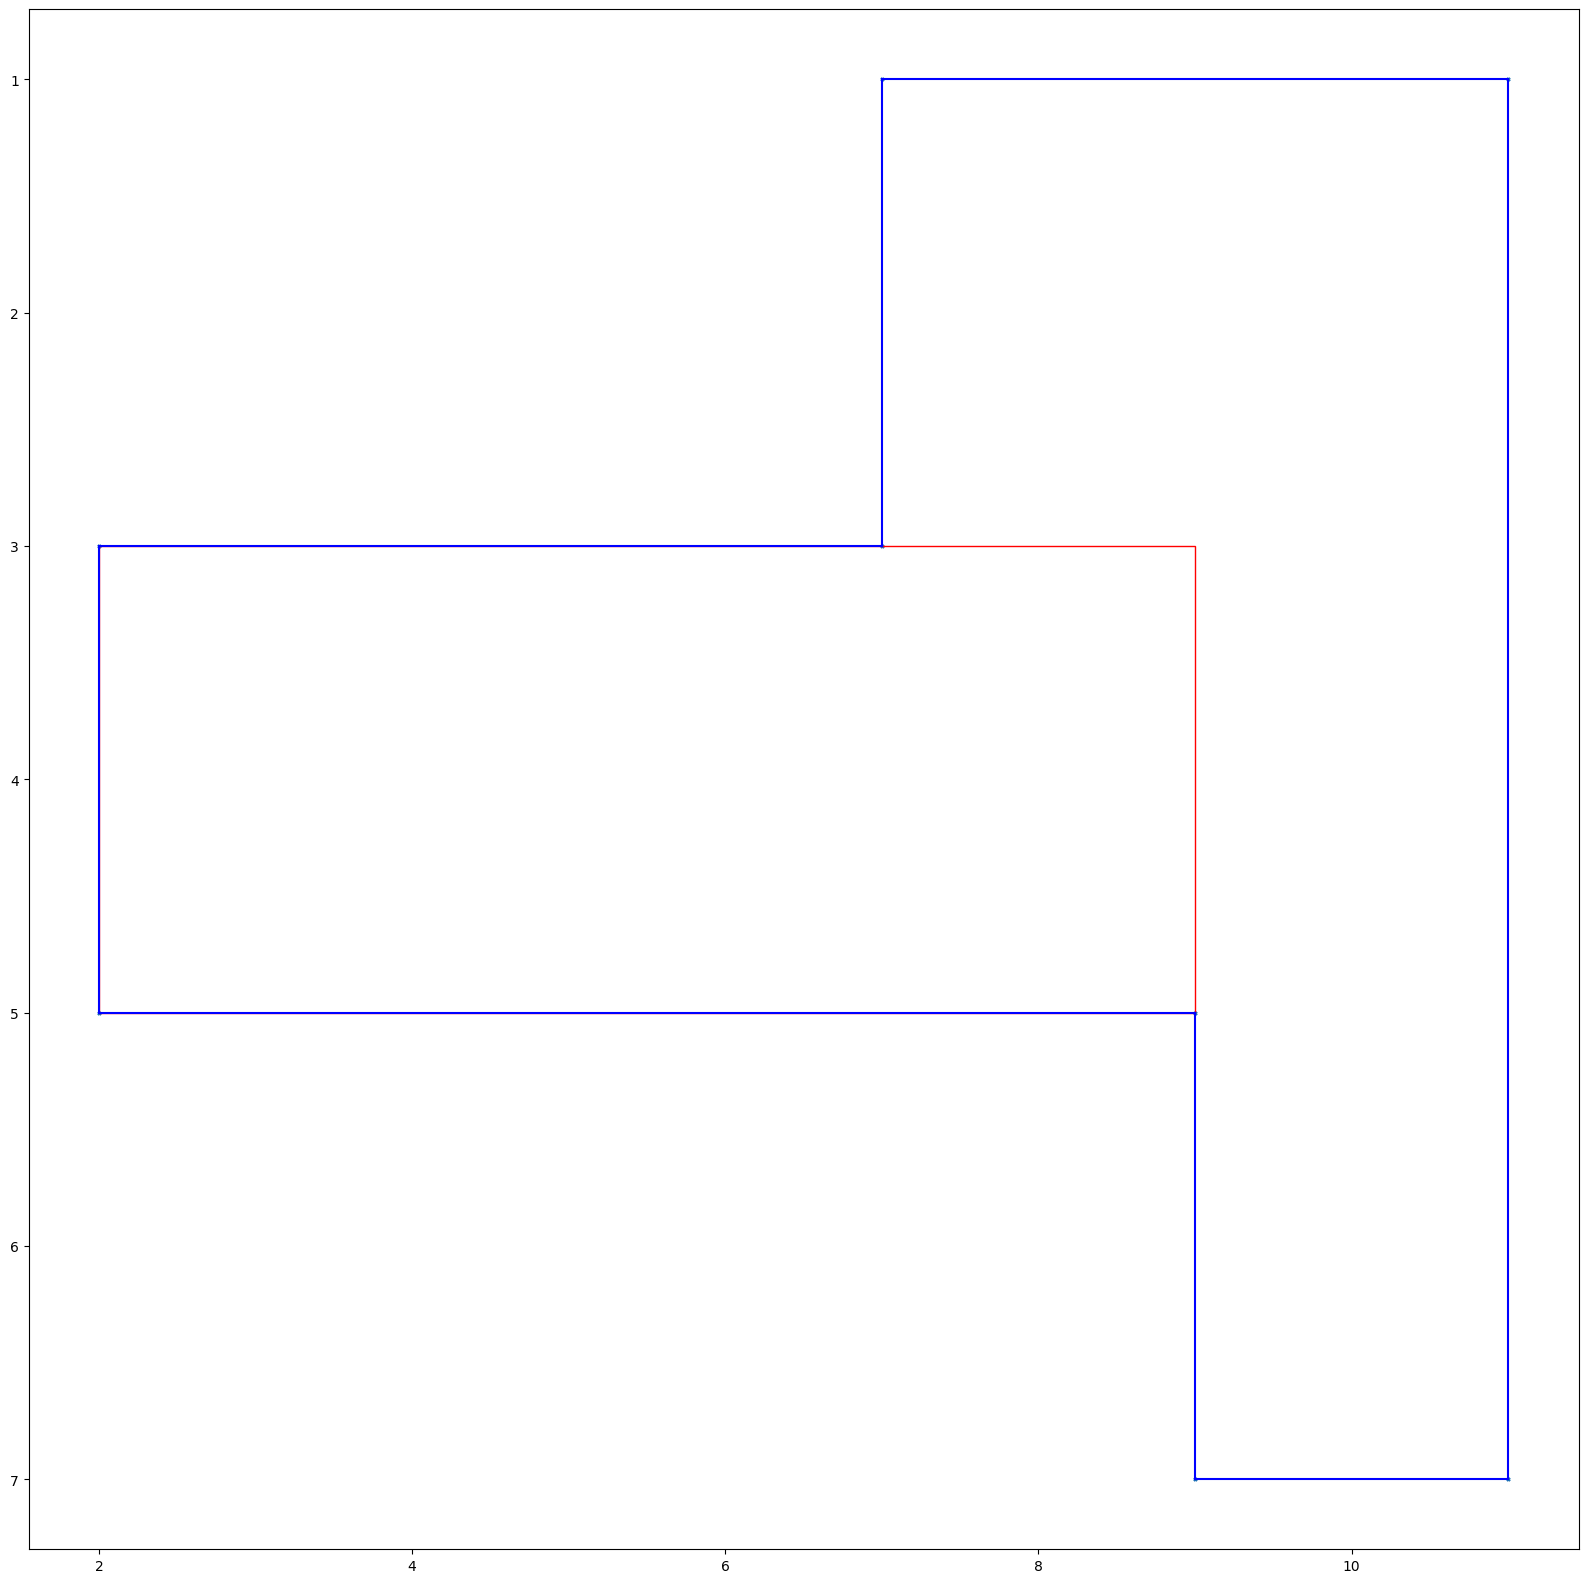

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.scatter(points[:,0], points[:,1], s=5, marker = 'x')
for c, d in zip(points, np.roll(points, -1, axis=0)):
    ax.plot([c[0], d[0]], [c[1], d[1]], 'b-')

rect = plt.Rectangle((min(a[0], b[0]), min(a[1], b[1])), abs(a[0]-b[0]), abs(a[1]-b[1]), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.invert_yaxis()
plt.show()